<a href="https://colab.research.google.com/github/footprinthere/DeepLearningWithTensorflow/blob/main/SentenceClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentence Setimental Classifier

### Modules

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pprint import pprint
import matplotlib.pyplot as plt

### Dataset

학습에 사용할 example data를 만든다.

In [2]:
# example data
sentences = ["역시 마블은 배신하지 않는다", "아 진짜 너무 재밌다",
             "연기력 좋고 볼 만했다", "정말 소름 돋았다",
             "따뜻함을 느낄 수 있었다", "오프닝이 기억에 남는다",
             "시간 가는 줄 모르고 봤다", "액션이 살아 있다",
             "전혀 기대하지 않았던 스토리였다", "본 걸 후회했다",
             "정말 지루하고 억지스러웠다", "스토리 개연성이 부족했다",
             "정말 많이 실망했다", "마블 영화 중 최악이었다",
             "지루하고 뻔한 영화였다", "액션이 적어 지루했다"]
labels = [0] * 8 + [1] * 8  # 0: Positive, 1: Negative

print(len(sentences))
print(len(labels))

16
16


sentences에 저장된 각 문장을 단어들의 list로 변환한다.

In [3]:
sentences = [sentence.split(' ') for sentence in sentences]

pprint(sentences)

[['역시', '마블은', '배신하지', '않는다'],
 ['아', '진짜', '너무', '재밌다'],
 ['연기력', '좋고', '볼', '만했다'],
 ['정말', '소름', '돋았다'],
 ['따뜻함을', '느낄', '수', '있었다'],
 ['오프닝이', '기억에', '남는다'],
 ['시간', '가는', '줄', '모르고', '봤다'],
 ['액션이', '살아', '있다'],
 ['전혀', '기대하지', '않았던', '스토리였다'],
 ['본', '걸', '후회했다'],
 ['정말', '지루하고', '억지스러웠다'],
 ['스토리', '개연성이', '부족했다'],
 ['정말', '많이', '실망했다'],
 ['마블', '영화', '중', '최악이었다'],
 ['지루하고', '뻔한', '영화였다'],
 ['액션이', '적어', '지루했다']]


문장 데이터를 수치 데이터로 변환하기 위해 단어들로 구성된 dictionary를 생성한다.

In [4]:
# create token dictionary
word_set = ['<pad>'] + sorted(set(sum(sentences, [])))
word2idx = {word : idx for idx, word in enumerate(word_set)}

pprint(word2idx)

{'<pad>': 0,
 '가는': 1,
 '개연성이': 2,
 '걸': 3,
 '기대하지': 4,
 '기억에': 5,
 '남는다': 6,
 '너무': 7,
 '느낄': 8,
 '돋았다': 9,
 '따뜻함을': 10,
 '마블': 11,
 '마블은': 12,
 '만했다': 13,
 '많이': 14,
 '모르고': 15,
 '배신하지': 16,
 '본': 17,
 '볼': 18,
 '봤다': 19,
 '부족했다': 20,
 '뻔한': 21,
 '살아': 22,
 '소름': 23,
 '수': 24,
 '스토리': 25,
 '스토리였다': 26,
 '시간': 27,
 '실망했다': 28,
 '아': 29,
 '않는다': 30,
 '않았던': 31,
 '액션이': 32,
 '억지스러웠다': 33,
 '역시': 34,
 '연기력': 35,
 '영화': 36,
 '영화였다': 37,
 '오프닝이': 38,
 '있다': 39,
 '있었다': 40,
 '재밌다': 41,
 '적어': 42,
 '전혀': 43,
 '정말': 44,
 '좋고': 45,
 '줄': 46,
 '중': 47,
 '지루하고': 48,
 '지루했다': 49,
 '진짜': 50,
 '최악이었다': 51,
 '후회했다': 52}


sentences의 문장들을 각 token에 해당하는 index 데이터로 변환한다.

In [5]:
# convert sequence of words into sequence of indices
x_data = list(map(lambda sentence : [word2idx.get(token) for token in sentence], sentences))
x_data_len = list(map(lambda sentence : len(sentence), sentences))

pprint(x_data)
print(x_data_len)

[[34, 12, 16, 30],
 [29, 50, 7, 41],
 [35, 45, 18, 13],
 [44, 23, 9],
 [10, 8, 24, 40],
 [38, 5, 6],
 [27, 1, 46, 15, 19],
 [32, 22, 39],
 [43, 4, 31, 26],
 [17, 3, 52],
 [44, 48, 33],
 [25, 2, 20],
 [44, 14, 28],
 [11, 36, 47, 51],
 [48, 21, 37],
 [32, 42, 49]]
[4, 4, 4, 3, 4, 3, 5, 3, 4, 3, 3, 3, 3, 4, 3, 3]


입력 데이터의 길이를 통일하기 위해 padding을 수행한다.

In [6]:
# padding
maxlen = max(x_data_len)
x_data = keras.preprocessing.sequence.pad_sequences(
    x_data, maxlen=maxlen, padding='post', truncating='post'
)

pprint(x_data)

array([[34, 12, 16, 30,  0],
       [29, 50,  7, 41,  0],
       [35, 45, 18, 13,  0],
       [44, 23,  9,  0,  0],
       [10,  8, 24, 40,  0],
       [38,  5,  6,  0,  0],
       [27,  1, 46, 15, 19],
       [32, 22, 39,  0,  0],
       [43,  4, 31, 26,  0],
       [17,  3, 52,  0,  0],
       [44, 48, 33,  0,  0],
       [25,  2, 20,  0,  0],
       [44, 14, 28,  0,  0],
       [11, 36, 47, 51,  0],
       [48, 21, 37,  0,  0],
       [32, 42, 49,  0,  0]], dtype=int32)


tf.data.Dataset으로 학습에 사용할 데이터셋을 구성한다.

In [7]:
# generate data pipeline
buffer_size = 20
batch_size = 4
dataset = tf.data.Dataset.from_tensor_slices((x_data, x_data_len, labels)).\
    shuffle(buffer_size).batch(batch_size)

print(dataset)

<BatchDataset shapes: ((None, 5), (None,), (None,)), types: (tf.int32, tf.int32, tf.int32)>


### Model

stacked RNN 형태의 모델을 구성한다.

In [8]:
# create model
hidden_size = [10, 10]
num_classes = 2
embedding_dim = len(word2idx)
one_hot = np.eye(embedding_dim)

model = keras.Sequential()
model.add(layers.Embedding(
    input_dim=embedding_dim, output_dim=embedding_dim, input_length=maxlen,
    trainable=False, mask_zero=True,
    embeddings_initializer=keras.initializers.Constant(one_hot)
))
model.add(layers.GRU(units=hidden_size[0], return_sequences=True))
model.add(layers.TimeDistributed(layers.Dropout(0.4)))
model.add(layers.GRU(units=hidden_size[1]))
model.add(layers.Dense(units=num_classes))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 5, 53)             2809      
_________________________________________________________________
gru (GRU)                    (None, 5, 10)             1950      
_________________________________________________________________
time_distributed (TimeDistri (None, 5, 10)             0         
_________________________________________________________________
gru_1 (GRU)                  (None, 10)                660       
_________________________________________________________________
dense (Dense)                (None, 2)                 22        
Total params: 5,441
Trainable params: 2,632
Non-trainable params: 2,809
_________________________________________________________________


학습에 사용할 loss function을 정의한다.

In [9]:
# define loss function
def loss_func(model, x, y):
    logits = model(x, training=True)
    return tf.reduce_mean(keras.losses.sparse_categorical_crossentropy(
        y_true=y, y_pred=logits, from_logits=True
    ))

gradient와 loss를 반환하는 함수를 정의한다.

In [10]:
# define gradient function
def grad_func(model, x, y):
    with tf.GradientTape() as tape:
        loss = loss_func(model, x, y)
    return tape.gradient(loss, model.variables), loss

학습에 사용할 Adam optimizer를 생성한다.

In [11]:
# create optimizer
lr = 0.01
epochs = 50
opt = keras.optimizers.Adam(learning_rate=lr)

### Training

구성한 모델을 이용해 학습을 수행한다.

In [12]:
# training
print("Training started.")
loss_hist = []

for epoch in range(1, epochs+1):
    total_loss = 0
    tr_step = 0

    for x, x_len, y in dataset:
        grads, loss = grad_func(model, x, y)
        opt.apply_gradients(zip(grads, model.variables))
        total_loss += loss
        tr_step += 1
    
    avg_loss = total_loss / tr_step
    loss_hist.append(avg_loss)

    if epoch % 5 == 0:
        print("epoch: {:4}, loss: {:.4f}".format(epoch, avg_loss))

print("Training finished.")

Training started.
epoch:    5, loss: 0.1865
epoch:   10, loss: 0.0029
epoch:   15, loss: 0.0025
epoch:   20, loss: 0.0008
epoch:   25, loss: 0.0006
epoch:   30, loss: 0.0005
epoch:   35, loss: 0.0005
epoch:   40, loss: 0.0004
epoch:   45, loss: 0.0004
epoch:   50, loss: 0.0004
Training finished.


학습 과정에서 각 epoch의 loss가 어떻게 변화하는지 확인한다.

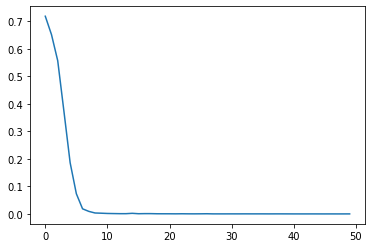

In [13]:
# check change of loss
plt.plot(loss_hist)

모델이 training set에 대해 어느 정도의 정확도를 보이는지 확인한다.

In [14]:
# check performance
pred = model.predict(x_data)
pred = np.argmax(pred, axis=-1)

acc = tf.reduce_mean(tf.cast(pred == labels, dtype=np.float32))
print("accuracy: {:.3%}".format(acc))

accuracy: 100.000%


### Test

데이터가 부족해서 아마 제대로 안 될 듯하다.

In [15]:
test_data = ["정말 재미있는 영화였다", "너무 지루하고 재미없었다"]
answer = [0, 1]
test_data = [sentence.split(' ') for sentence in test_data]
test_data = list(map(lambda sentence : [word2idx.get(token, 0) for token in sentence], test_data))
test_data = keras.preprocessing.sequence.pad_sequences(
    test_data, maxlen=maxlen, padding='post', truncating='post'
)
print(test_data)
print()

test_pred = np.argmax(model.predict(test_data), axis=-1)
print(test_pred, answer)
print("test accuracy: {:.3%}".format(tf.reduce_mean(tf.cast(test_pred==answer, np.float32), axis=-1)))

[[44  0 37  0  0]
 [ 7 48  0  0  0]]

[1 0] [0, 1]
test accuracy: 0.000%


In [16]:
test_data = ["어쩜 이렇게 재미있을 수가", "다시는 보고 싶지 않다"]
answer = [0, 1]
test_data = [sentence.split(' ') for sentence in test_data]
test_data = list(map(lambda sentence : [word2idx.get(token, 0) for token in sentence], test_data))
test_data = keras.preprocessing.sequence.pad_sequences(
    test_data, maxlen=maxlen, padding='post', truncating='post'
)
print(test_data)
print()

test_pred = np.argmax(model.predict(test_data), axis=-1)
print(test_pred, answer)
print("test accuracy: {:.3%}".format(tf.reduce_mean(tf.cast(test_pred==answer, np.float32), axis=-1)))

[[0 0 0 0 0]
 [0 0 0 0 0]]

[1 1] [0, 1]
test accuracy: 50.000%
